In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import matplotlib as mpl
import datetime
from datetime import timedelta
# from datetime import datetime, date
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import os

In [9]:
pwd

'/home/miwoos/WorkSpace/Jeju_Electric_Vehicle_analysis'

In [11]:
# os.chdir('D:\GoogleDrive\Data\Data\제주_전기차\data')
os.chdir('/home/miwoos/WorkSpace/GoogleDrive/제주_전기차/data/')

In [12]:
ls

 관련키워드.csv                    전기차관련검색어인기순.csv
 네이버-제주전기차후기통합.csv     전기차관심도지역.csv
 느영나영전기차크롤링.csv          전기차관심증가.csv
 느영나영전기차크롤링.csv.part     전기차키워드관련주제인기순.csv
'본문 검색 결과_2022.03.06.xlsx'   전체본문의댓글결과_2022.03.06.xlsx
'전기차 동호회 전기차크롤링.csv'   제사모크롤링.csv


In [4]:
df_google = pd.read_csv('전기차관심증가.csv')

In [5]:
df_google
    

,카테고리: 모든 카테고리
주,전기차: (대한민국)
2017-03-19,40
2017-03-26,26
2017-04-02,27
2017-04-09,24
...,...
2022-02-13,81
2022-02-20,80
2022-02-27,76
2022-03-06,69


In [6]:
df_제사모 = pd.read_csv('제사모크롤링.csv')
df_제사모.head(3)

,제목,내용,댓글,유형,조회수,작성날짜
0,봉고3더블캡,"※ 보다 투명하고, 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요. ※ \n...",가격이 궁금해요..^^\n얼마인가요ㅡ\n,제사모 중고장터,130,2022.03.16.
1,렌트카 알아보고 있는데 lpg 차량이 저렴한 이유가 뭘까요?,육지에서 이번주 토욜부터 제주 한달살이 시작하면서. 렌트카 알아보고 있어요. 육지에...,요즘 전기차가 대세기도 하지만 가스값 장난아니게 올랏어요...또한 한달살기라면 자차...,Q. 종합 질문방,161,2022.03.16.
2,더 뉴 아이오닉 일렉트릭N 20년형 흰색7만 현대스마트센스 l추가 완전무사고/믿고사...,★ 차량 정보 ★\n\n▶▷모델명 : 더 뉴 아이오닉 일렉트릭 N 전기차\n\n▶▷...,NaN,중고자동차 매물,62,2022.03.16.


In [7]:
df_제사모['월별']=df_제사모.작성날짜.apply(lambda x: x[:-4])

In [8]:
df

NameError: name 'df' is not defined

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86]),
 [Text(0, 0, '2010.06'),
  Text(1, 0, '2010.11'),
  Text(2, 0, '2011.06'),
  Text(3, 0, '2012.07'),
  Text(4, 0, '2013.04'),
  Text(5, 0, '2014.02'),
  Text(6, 0, '2014.03'),
  Text(7, 0, '2014.07'),
  Text(8, 0, '2014.08'),
  Text(9, 0, '2014.09'),
  Text(10, 0, '2014.11'),
  Text(11, 0, '2015.03'),
  Text(12, 0, '2015.04'),
  Text(13, 0, '2015.12'),
  Text(14, 0, '2016.01'),
  Text(15, 0, '2016.02'),
  Text(16, 0, '2016.03'),
  Text(17, 0, '2016.04'),
  Text(18, 0, '2016.05'),
  Text(19, 0, '2016.07'),
  Text(20, 0, '2016.08'),
  Text(21, 0, '2016.09'),
  Text(22, 0, '2016.10'),
  Text(23, 0, 

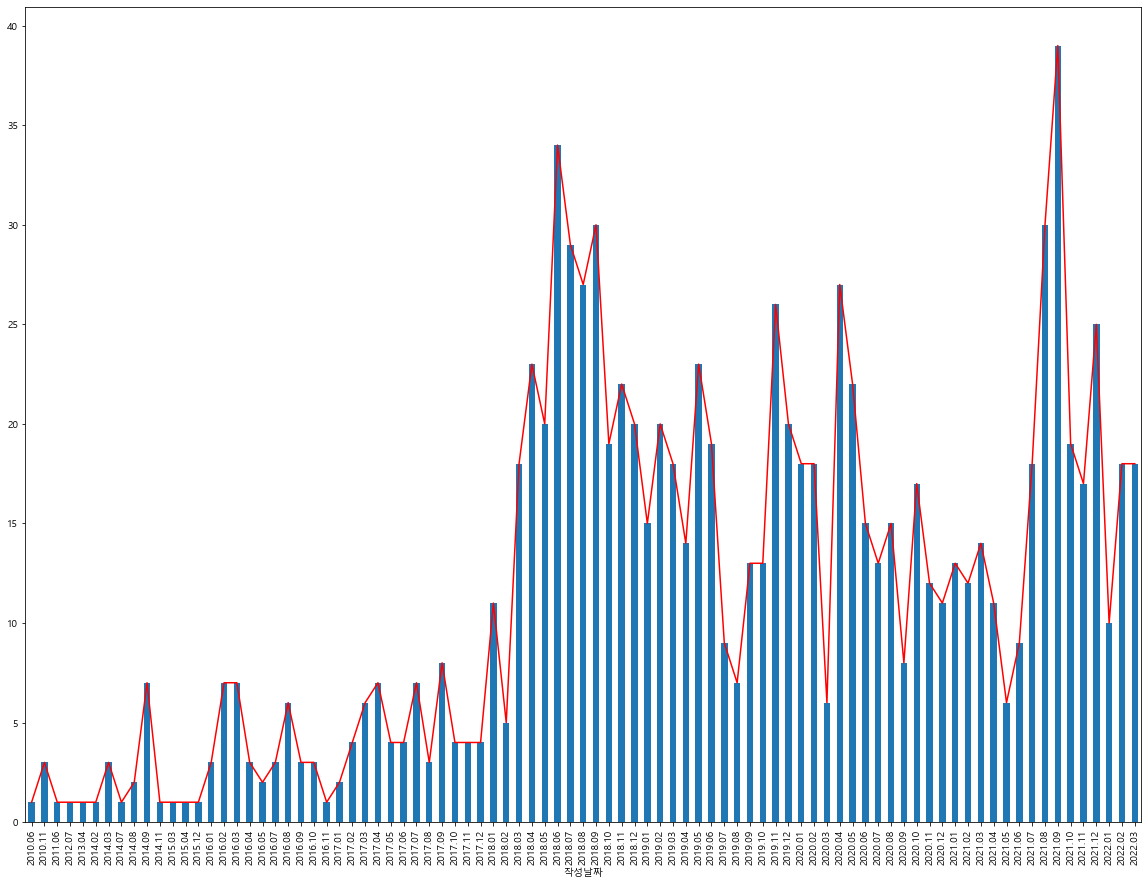

In [ ]:
plt.figure(figsize=(20,15))
df_제사모.groupby(df_제사모.월별).월별.count().plot.bar()
df_제사모.groupby(df_제사모.월별).월별.count().plot(color='red')
plt.xticks(rotation=45)

In [ ]:
df_제사모=pd.concat([df_제사모,pd.DataFrame(df_제사모.월별).rename(columns={'작성날짜':'작성월분류'},inplace=True)],axis=1)

In [ ]:
int(df_제사모.조회수])

130

In [ ]:
df_제사모['조회수']=df_제사모['조회수'].str.replace('.만','000').str.replace(',','').str.replace('.','').astype(int)

C:\Users\alsdn\AppData\Local\Temp/ipykernel_20748/2450812333.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_제사모['조회수']=df_제사모['조회수'].str.replace('.만','000').str.replace(',','').str.replace('.','').astype(int)
C:\Users\alsdn\AppData\Local\Temp/ipykernel_20748/2450812333.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_제사모['조회수']=df_제사모['조회수'].str.replace('.만','000').str.replace(',','').str.replace('.','').astype(int)


In [ ]:
df_제사모.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      1016 non-null   object
 1   내용      926 non-null    object
 2   댓글      603 non-null    object
 3   유형      1016 non-null   object
 4   조회수     1016 non-null   int32 
 5   작성날짜    1016 non-null   object
 6   월별      1016 non-null   object
dtypes: int32(1), object(6)
memory usage: 51.7+ KB


<AxesSubplot:xlabel='월별'>

<Figure size 1440x1080 with 0 Axes>

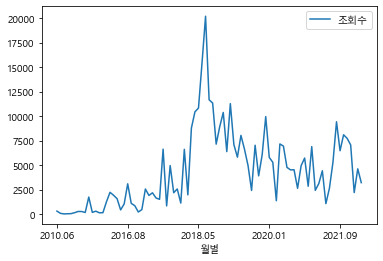

In [ ]:
plt.figure(figsize=(20,15))
pd.DataFrame(df_제사모.groupby(['월별'])['조회수'].sum()).plot()

In [ ]:
df_제사모=pd.concat([df_제사모,pd.DataFrame(df_제사모.월별)],axis=1)

,제목,내용,댓글,유형,조회수,작성날짜,작성날짜
0,봉고3더블캡,"※ 보다 투명하고, 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요. ※ \n...",가격이 궁금해요..^^\n얼마인가요ㅡ\n,제사모 중고장터,130,2022.03.16.,2022.03
1,렌트카 알아보고 있는데 lpg 차량이 저렴한 이유가 뭘까요?,육지에서 이번주 토욜부터 제주 한달살이 시작하면서. 렌트카 알아보고 있어요. 육지에...,요즘 전기차가 대세기도 하지만 가스값 장난아니게 올랏어요...또한 한달살기라면 자차...,Q. 종합 질문방,161,2022.03.16.,2022.03
2,더 뉴 아이오닉 일렉트릭N 20년형 흰색7만 현대스마트센스 l추가 완전무사고/믿고사...,★ 차량 정보 ★\n\n▶▷모델명 : 더 뉴 아이오닉 일렉트릭 N 전기차\n\n▶▷...,NaN,중고자동차 매물,62,2022.03.16.,2022.03
3,요번에 보니..,안에\n\n렌터카 무진장 많이 다니던데..\n\n임산부 노약자 상관없이..\n\n넘...,NaN,실시간 이야기,119,2022.03.15.,2022.03
4,제주시 애월읍 해안도로 도보 1분 거리 애월 르시엘 아파트 할인 분양(회사 직영),◈ 매물제목 : 애월 르시엘 분양\n◈ 거래유형 : 분양\n◈ 소재지역 : 애...,NaN,■ 분양정보/신축매물,134,2022.03.15.,2022.03
...,...,...,...,...,...,...,...
1011,잘잘특공대~~~~,JIBS 방송국...잘잘특공대인가..\n요즘 뭐 시장을 돌면서 하는 프로그램에서~~...,잘 피하세요 ^^ ㅋㅋㅋ\n안에 짱박혀서...그냥 있어요ㅕ~~~\n제가 하는 파트랑...,이시국 랜선여행 (종료),31,2011.06.09.,2011.06
1012,제목이 없습니다,내용이 없습니다,댓글이 없습니다,유형이 없습니다,16,2010.11.29.,2010.11
1013,전기차~~~,아주 아담한 전기차~~~~,헛..어디 김녕에서 찍은건가요? 어디서 찍은거죠? ^^;;\n글고 요차.....넘 ...,실시간 이야기,65,2010.11.22.,2010.11
1014,제목이 없습니다,내용이 없습니다,댓글이 없습니다,유형이 없습니다,8,2010.11.19.,2010.11


In [ ]:
df_느영나영 = pd.read_csv('느영나영전기차크롤링.csv')
df_느영나영.head(3)

,제목,내용,댓글,유형,조회수,작성날짜
0,우도갈때 렌트카 가지고 들어가는게 나을까요?,영유아있어서 가능하긴한데 글보니 전기차들 많아서\n운전불편할수도 있다는 글을 봐서요...,예전에는 전기차에 자동차에 길은 좁은데 구불구불 운전하면서도 위험 느낄때 많았는데 ...,┌─┐여행 준비하기,365,2022.03.15.
1,5개월된 애기와 와이프 이렇게 3명서 여행갑니다~~장소 추천부탁해요~,이번 제주도 여행은 정말로 다르네요..ㅎㅎ\n기존에는 남자끼리 여행을 다녀서 코스가...,날씨 확인하시고 좋으면 우도가세요 서빈백사에서 발도담그고 바다멍해도 좋을것같아요\n...,┌─┐여행 준비하기,113,2022.03.15.
2,4월말 예정인데 벌써 LPG는 다 나갔을까요,SK렌터카고 롯데렌터카고 죄다 휘발류 디젤 전기차 밖에 없네요ㅎㅎ\n전기차는 사실 ...,기름 값도 비싸고 LPG도 가격이 많이 올랐기는 마찬가지에요.\n전기차 빌리시는게 ...,┌─┐여행 준비하기,368,2022.03.15.


In [ ]:
df_투플럭스 = pd.read_excel('본문 검색 결과_2022.03.06.xlsx')

In [ ]:
df_투플럭스.head(2)

,Unnamed: 0,classCode,필터명,수집채널,카페명,제목,작성자,작성시간,조회수,댓글수,...,Url,Contents,ChannelCode,ContentType,PostNo,Sno,Og_ImageUrl,Og_Description,grpNo,SeqIdx
0,NaN,-99,NaN,네이버카페,전기차동호회,아이오닉5 휠베이스 3000의 가치,용꽁I코나일렉I군포,2021-01-12 17:01:00,7147,16,...,https://cafe.naver.com/allfm01/550997,▶ 아이오닉5 휠베이스 3000의 가치_x000D_\n_x000D_\n서비스센터 갔...,1002,P,79504497,0,NaN,NaN,1116,79504497
1,NaN,-99,NaN,네이버카페,전기차동호회,"현대차 아이오닉5 vs 테슬라 모델Y, 뭘 살까요?",뭉치I오닉5모3I서울,2021-02-23 21:36:00,4268,19,...,https://cafe.naver.com/allfm01/570331,"▶ 현대차 아이오닉5 vs 테슬라 모델Y, 뭘 살까요?_x000D_\n_x000D_...",1002,P,82848532,0,NaN,NaN,1116,82848532


In [14]:
df_네이버뷰 = pd.read_csv('네이버-제주전기차후기통합.csv')

In [19]:
df_네이버뷰.날짜.value_counts()

2019.04.03.    103
2019.04.04.     64
2019.04.02.     55
2019.04.01.     33
2020.01.21.     24
              ... 
2016.05.04.      1
2016.04.21.      1
2016.04.20.      1
2016.04.18.      1
2017.07.09.      1
Name: 날짜, Length: 1955, dtype: int64

In [21]:
pwd

'/home/miwoos/WorkSpace/GoogleDrive/제주_전기차/data'

In [23]:
os.chdir('/home/miwoos/WorkSpace/Jeju_Electric_Vehicle_analysis')

In [24]:
pwd

'/home/miwoos/WorkSpace/Jeju_Electric_Vehicle_analysis'

In [25]:
cd /home/miwoos/WorkSpace/Jeju_Electric_Vehicle_analysis

/home/miwoos/WorkSpace/Jeju_Electric_Vehicle_analysis


In [26]:
!git add .

In [28]:
!git commit -m 'commit test'

현재 브랜치 main
브랜치가 'origin/main'에 맞게 업데이트된 상태입니다.

커밋하도록 정하지 않은 변경 사항:
  (무엇을 커밋할지 바꾸려면 "git add <파일>..."을 사용하십시오)
  (작업 디렉토리의 변경을 무시하려면 "git restore <file>..."을 사용하시오)
	수정함:        "\353\215\260\354\235\264\355\204\260\355\231\225\354\235\270.ipynb"

커밋할 변경 사항을 추가하지 않았습니다 ("git add" 및/또는 "git commit -a"를
사용하십시오)


In [ ]:
!git add .
!git commit -m 'jupyter lab 에서 커밋하기'

In [ ]:
!git push

In [ ]:
asdas